# Ideal controllers from model inverse

In [1]:
import control as ctrl 
import matplotlib.pyplot as plt
s = ctrl.tf([1,0],[0,1])

## Controller from model inverse

Goal, closed loop should be equal to reference model $M(s)$

Same method used for IMC-controller design (Internal Model Control).

$$
\dfrac{C(s)G(s)}{1+C(s)G(s)} = M(s)
$$

$$
C(s)G(s) = M(s)(1+C(s)G(s))
$$


$$
C(s)(G(s)-M(s)G(s)) = M(s)
$$

$$
C(s) = \dfrac{M(s)}{1 - M(s)}G^{-1}(s)
$$


# PT1 system
Plant
$$
G(s) = \dfrac{K_g}{s\tau + 1}
$$
Ref model, $\lambda$ is the tuning constant.
$$
M(s) = \dfrac{1}{s\lambda + 1}
$$
Ideal controller
$$
C(s) = \dfrac{\dfrac{1}{(s\lambda + 1)}}{(1-\dfrac{1}{s\lambda + 1})}\dfrac{(s\tau + 1)}{K_g} = \dfrac{s\tau + 1}{s\lambda K_g} 
$$
Which is a standard PI-controller

$$
C_{PI}(s) = K_p(1 + \frac{1}{T_is}) = \frac{K_p s + \frac{K_p}{T_i}}{s}
$$

$$
K_p = \frac{\tau}{\lambda K_g}
$$

$$
T_i = K_p\lambda K_g
$$



In [2]:
# Plant
tau = 0.2
Kg = 10

G1 = Kg/(s*tau + 1)

# Ref model and controller
lam = 0.01
M1 = 1/(s*lam + 1)

C1 = 1/G1 * M1/(1-M1)
C1 = ctrl.minreal(C1)
C1

1 states have been removed from the model


TransferFunction(array([ 2., 10.]), array([1., 0.]))

In [3]:
# Use gain formulas, shuld produce the same result

Kp = tau/(lam*Kg) 
Ti = Kp*lam*Kg

C12 = Kp*(1 + 1/(s*Ti))
C12 = ctrl.minreal(C12)
C12

0 states have been removed from the model


TransferFunction(array([ 2., 10.]), array([1., 0.]))

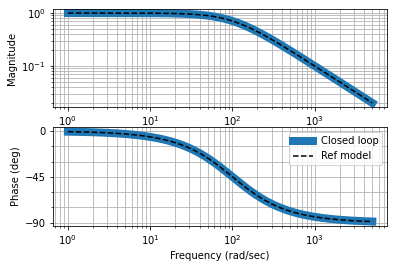

In [4]:
# Verify close loop
L1 = G1*C1

CL1 = L1/(L1+1)
#ctrl.bode(L1/(1+L1))
ctrl.bode(CL1,omega_limits =(1,5000),label='Closed loop',linewidth=8)
ctrl.bode(M1,omega_limits =(1,5000),linestyle='--',color='k',label='Ref model')
plt.legend()
plt.show()

In [5]:
ctrl.minreal(CL1)

3 states have been removed from the model


TransferFunction(array([100.]), array([  1., 100.]))

In [6]:
ctrl.minreal(M1)

0 states have been removed from the model


TransferFunction(array([100.]), array([  1., 100.]))

# PT2 systems

Plant
$$
G(s) = \dfrac{K_g}{\frac{s^2}{\omega_c^2} + \frac{2s\delta}{\omega_c} + 1}
$$
Ref model, $\lambda$ is the tuning constant.
$$
M(s) = \dfrac{1}{\frac{s^2}{\lambda^2} + \frac{2s}{\lambda} + 1}
$$
Ideal controller
$$
C(s) = \dfrac{(\frac{s^2}{\omega_c^2} + \frac{2s\delta}{\omega_c} + 1)}{K_g} \dfrac{\frac{s^2}{\lambda^2} + \frac{2s}{\lambda} + 1}{\frac{s^2}{\lambda^2} + \frac{2s}{\lambda}}
= 
\dfrac{(\frac{s^2}{\omega_c^2} + \frac{2s\delta}{\omega_c} + 1)}{K_g(\frac{s^2}{\lambda^2} + \frac{2s}{\lambda})} = 
\dfrac{(\frac{\lambda s^2}{2\omega_c^2 K_g} + \frac{\lambda s\delta}{\omega_c K_g} + \frac{\lambda}{2K_g})}{\frac{s^2}{2\lambda} + s}
$$

Which is a standard PID controller

$$
C_{PID}(s) = K_p (1 + \frac{1}{s T_i} +  \frac{K_ds}{s T_d + 1}) =  \frac{K_p(s T_d + 1) s + \frac{K_p}{T_i}(s T_d + 1) +  K_p K_d s^2}{(s T_d + 1) s}
$$
$$
=\frac{s^2 (K_p T_d + K_p K_d) + s (K_p + \frac{K_p}{T_i} T_d) + \frac{K_p}{T_i}}{s^2 T_d + s}
$$




Matching coefficients

$$
T_d = \frac{1}{2 \lambda}
$$

$$
K_p T_d + K_p K_d = \frac{\lambda}{2\omega_c^2 K_g}
$$

$$
K_p + \frac{K_p}{T_i} T_d = \frac{\lambda \delta}{\omega_c K_g}
$$

$$
\frac{K_p}{T_i} = \frac{\lambda}{2K_g}
$$


Solving for them
$$
K_p^2 \, \frac{2K_g}{\lambda} + K_p (T_d - \frac{2\delta }{\omega_c}) =0
$$

$$
K_p^2  + K_p (T_d - \frac{2\delta }{\omega_c})\frac{\lambda}{2K_g} =0
$$

$$
\alpha = (T_d - \frac{2\delta }{\omega_c})\frac{\lambda}{2K_g}
$$

$$
K_p = -\frac{\alpha}{2} \pm \sqrt{\frac{\alpha^2}{4}}
$$

$$
K_d = \frac{\frac{\lambda}{2\omega_c^2 K_g} - K_p T_d}{K_p}
$$

$$
T_i = 2 \frac{K_p \, K_g}{\lambda}
$$

In [9]:

# ref model
lam = 10
M = 1/(s**2/lam**2 + 2*s/lam +1)

# Plant

wc = 5
delta = 0.3
Kg = 13.37

G = ctrl.tf(Kg,[1/wc**2,2*delta/wc,1])
G

TransferFunction(array([13.37]), array([0.04, 0.12, 1.  ]))

In [ ]:
# PID gains
Td = 1/(2*lam)
Kp = lam*delta/(wc*Kg*(1+Ts*lam/(K)))

